Importation librairies

In [1]:
import matplotlib.pyplot as plt

In [2]:
#importation des données des fichiers
data_words = open("C:/Users/benoi/Documents/ACO/boulot 3A/ICE/english-words.txt")
words = data_words.read()
data_proteome = open("C:/Users/benoi/Documents/ACO/boulot 3A/ICE/human-proteome.fasta")
proteome = data_proteome.read()

#fermeture des fichiers
data_words.close()
data_proteome.close()

In [3]:
print(words[0:50])

a
abandon
ability
able
abortion
about
above
abroad


In [4]:
print(proteome[0:1000])

>sp|O95139|NDUB6_HUMAN NADH dehydrogenase [ubiquinone] 1 beta subcomplex subunit 6 OS=Homo sapiens OX=9606 GN=NDUFB6 PE=1 SV=3
MTGYTPDEKLRLQQLRELRRRWLKDQELSPREPVLPPQKMGPMEKFWNKFLENKSPWRKM
VHGVYKKSIFVFTHVLVPVWIIHYYMKYHVSEKPYGIVEKKSRIFPGDTILETGEVIPPM
KEFPDQHH
>sp|O75438|NDUB1_HUMAN NADH dehydrogenase [ubiquinone] 1 beta subcomplex subunit 1 OS=Homo sapiens OX=9606 GN=NDUFB1 PE=1 SV=1
MVNLLQIVRDHWVHVLVPMGFVIGCYLDRKSDERLTAFRNKSMLFKRELQPSEEVTWK
>sp|Q8N4C6|NIN_HUMAN Ninein OS=Homo sapiens OX=9606 GN=NIN PE=1 SV=4
MDEVEQDQHEARLKELFDSFDTTGTGSLGQEELTDLCHMLSLEEVAPVLQQTLLQDNLLG
RVHFDQFKEALILILSRTLSNEEHFQEPDCSLEAQPKYVRGGKRYGRRSLPEFQESVEEF
PEVTVIEPLDEEARPSHIPAGDCSEHWKTQRSEEYEAEGQLRFWNPDDLNASQSGSSPPQ
DWIEEKLQEVCEDLGITRDGHLNRKKLVSICEQYGLQNVDGEMLEEVFHNLDPDGTMSVE
DFFYGLFKNGKSLTPSASTPYRQLKRHLSMQSFDESGRRTTTSSAMTSTIGFRVFSCLDD
GMGHASVERILDTWQEEGIENSQEILKALDFSLDGNINLTELTLALENELLVTKNSIHQA
ALASFKAEIRHLLERVDQVVREKEKLRSDLDKAEKLKSLMASEVDDHHAAIERRNEYNLR
KLDEEYKERIAALKNELRKEREQILQQAGKQRLELEQEIEKAKTEENYIRDRLALSLKEN

In [6]:
# on cherche des motifs particuliers du fichier FASTA qui ne correspondent pas au génome.
# en effet, le fichier FASTA contient souvent des séquences de caracteres commencant par '>sp' et finissant par 'SV='.
# cela ne correspond pas a des séquences ADN, on exclue donc cela.

def fasta_to_strlist(L): 
    sq = '' # sq va contenir une sequence sous la forme de str.
    L2 = [] # L2 va contenir la liste de toutes ces séquences.
    add = 0
    for k in range(len(L)): # on parcourt un par un tous les elements du str L.
        if (L[k:k+3] == '>sp' and sq!='') or k==len(L)-1 : # si le motif '>sp' es trouvé (début d'un motif non génomique): 
            add = 0 # alors add = 0 : on n'ajoute plus d'elements dans sq.
            sq = sq.lower()
            L2.append(sq) # sq est finie : on l'ajoute dans L2
        
        if add==1 and L[k]!='\n': #tant que add = 1, on ajoute les caracteres dans sq. 
            #(sauf s'ils correspondent a un changement de ligne '\n')
            sq = sq + L[k]    
        
        if L[k-3:k] == 'SV=': #fin du motif non génomique.
            add = 1 # on remet de nouveau chaque element dans une séquence.
            sq = '' #sq est donc réinitialisé afin de construire une nouvelle séquence.
    return(L2)

In [7]:
proteome = fasta_to_strlist(proteome)
print(proteome[0:2])
print('nombre de sequences : ',len(proteome))

['mtgytpdeklrlqqlrelrrrwlkdqelsprepvlppqkmgpmekfwnkflenkspwrkmvhgvykksifvfthvlvpvwiihyymkyhvsekpygivekksrifpgdtiletgevippmkefpdqhh', 'mvnllqivrdhwvhvlvpmgfvigcyldrksderltafrnksmlfkrelqpseevtwk']
nombre de sequences :  20373


In [8]:
def str_to_strlist(L):
    L2 = [] # liste qui va contenir tous les mots compris dans L.
    w = '' # str qui va contenir un mot. puis etre réinitilisé, puis contenir un nouveau mot, etc.
    for k in L :
        if k != '\n': #tant qu'il n'y a pas de retour à la ligne de détecté
            w = w + k # on ajoute les elements de L dans le mot w.
        else:
            w = w.lower() 
            L2 = L2 + [w] #quand un retour a la ligne est détecté : on ajoute le mot a la liste L2
            w = '' # w est réinitilisé et on recommence...
    return(L2)

In [9]:
print(words[0:50])         

a
abandon
ability
able
abortion
about
above
abroad


In [10]:
words = str_to_strlist(words)  
print(words[0:50]) 

['a', 'abandon', 'ability', 'able', 'abortion', 'about', 'above', 'abroad', 'absence', 'absolute', 'absolutely', 'absorb', 'abuse', 'academic', 'accept', 'access', 'accident', 'accompany', 'accomplish', 'according', 'account', 'accurate', 'accuse', 'achieve', 'achievement', 'acid', 'acknowledge', 'acquire', 'across', 'act', 'action', 'active', 'activist', 'activity', 'actor', 'actress', 'actual', 'actually', 'ad', 'adapt', 'add', 'addition', 'additional', 'address', 'adequate', 'adjust', 'adjustment', 'administration', 'administrator', 'admire']


In [11]:
def list_letters(L):
    letters = []
    for sq in L:
        for l in sq:
            if l not in letters:
                letters.append(l)
    letters.sort()
    return(letters)

In [12]:
letters = list_letters(proteome)
print(letters)

['a', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y']


In [13]:
def del_words(L,listl):
    L2=[]
    for w in L:
        c = 1 # tant que c = 1, on garde le mot.
        for l in w:
            if l not in listl: # mais si un des lettres de listl est détectée dans le mot : 
                c = 0 # alors c = 0, on ne garde pas le mot.
        if c == 1:
            L2.append(w)
    return(L2)

In [14]:
print('avant: ',len(words))
words = del_words(words,letters)
print('apres: ',len(words))

avant:  2999
apres:  1640


In [15]:
def balayage(Lw, Lsq):
    M = []
    for num_sq in range(len(Lsq)): # on prend les séquences une par une
            
        sq = Lsq[num_sq]
        n = len(sq)
        for word in Lw: #pour une séquence donnée, on étudie les mots un par un.
            nbw = 0
            for pos in range (0, n - len(word) + 1): #pour un mot donné, on cherche s'il est dans la séquence, position par position.
                word_in_sq = True
                for k in range (0,len(word)):
                    if sq[pos+k] != word[k]:
                        word_in_sq = False
                if word_in_sq: #si le mot est trouvé dans la séquence, on ajoute 1 au compteur nbw.
                    nbw += 1
            if nbw!=0:
                M.append([word,num_sq+1,nbw]) #on ajoute une ligne dans la matrice, avec : le mot, la séquence, son nonmbre d'apparitions.
            
    
    return(M)

In [16]:
M = balayage(words,proteome[0:2])
print(M)

[['give', 1, 1], ['i', 1, 7], ['if', 1, 2], ['let', 1, 1], ['me', 1, 1], ['pm', 1, 2], ['vs', 1, 1], ['a', 2, 1], ['i', 2, 2], ['pm', 2, 1], ['see', 2, 1]]


La fonction findwords() prend en argument le résultat de balayage(), et renvoie la liste des mots présents dedans.
On peut donc savoir quels mots sont présents dans un ensemble défini du génome.

In [17]:
def findwords(L):
    w = []
    for e in L:
        if e[0] not in w: #on s'assure que chaque mot est ajouté uniquement une fois dans w.
            w.append(e[0])
    return(w)

Exemple d'utilisation de la fonction findwords() sur la séquence 150 : 

In [18]:
M2 = balayage(words,[proteome[150]])
print(findwords(M2))

['a', 'ad', 'age', 'ah', 'aid', 'as', 'at', 'edge', 'gap', 'gay', 'i', 'ie', 'if', 'lip', 'me', 'mr', 'ms', 'pc', 'per', 'sad', 'sea', 'see', 'set', 'tv', 'vs']


La fonction nbwords() ressemble à findwords(), sauf qu'elle indique le nombre de fois que chaque mot apparait.
De plus, les mots sont triés par ordre croissant du nombre de fois ou ils apparaissent.

In [19]:
def nbwords(L):
    w = findwords(L)
    w = [  [0,w[k]] for k in range(len(w))   ]
    for e in L:
        for e2 in w:
            if e[0] == e2[1]:
                e2[0] += e[2]
    w = sorted(w)
    w.reverse()
    return(w)
    
    

On chercher ci-dessous les mots présents dans les 21 premières séquences du génome.
Ils sont triés selon le nombre de fois qu'ils apparaissent.

In [33]:
L = balayage(words,proteome[0:20])
res = nbwords(L)
print(res)

[[886, 'a'], [449, 'i'], [81, 'as'], [48, 'vs'], [39, 'tv'], [33, 'at'], [29, 'ie'], [26, 'me'], [26, 'he'], [26, 'ad'], [25, 'it'], [24, 'ah'], [17, 'if'], [15, 'hi'], [14, 'ms'], [14, 'am'], [13, 'we'], [13, 'see'], [11, 'in'], [9, 'pm'], [9, 'pc'], [9, 'mr'], [9, 'gas'], [7, 'all'], [6, 'leg'], [6, 'era'], [5, 'sea'], [5, 'ear'], [4, 'via'], [4, 'lip'], [4, 'let'], [4, 'eat'], [4, 'art'], [4, 'age'], [3, 'sit'], [3, 'set'], [3, 'per'], [3, 'lie'], [3, 'lap'], [3, 'ill'], [3, 'gap'], [3, 'eye'], [3, 'ask'], [2, 'yet'], [2, 'try'], [2, 'the'], [2, 'ski'], [2, 'sir'], [2, 'red'], [2, 'pet'], [2, 'my'], [2, 'lay'], [2, 'fee'], [2, 'egg'], [2, 'dry'], [2, 'day'], [2, 'car'], [2, 'act'], [1, 'yes'], [1, 'well'], [1, 'teen'], [1, 'tea'], [1, 'tap'], [1, 'sky'], [1, 'sin'], [1, 'shit'], [1, 'ship'], [1, 'she'], [1, 'seat'], [1, 'say'], [1, 'sale'], [1, 'sake'], [1, 'sad'], [1, 'risk'], [1, 'rid'], [1, 'raw'], [1, 'rain'], [1, 'peak'], [1, 'pay'], [1, 'pass'], [1, 'part'], [1, 'pan'], [1, 'p

Visualisation du nombre de fois que chaque mot apparait dans les 21 premieres séquences :

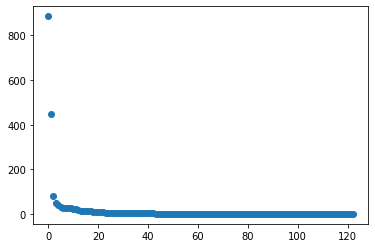

In [31]:
X = [k for k in range(len(res))] # entier 1,2 ,3... jusqu'a len(res)
Y = [k[0] for k in res] # nombre d'apparition de chaque mot (par ordre croissant)
plt.plot(X,Y,"o")
plt.show()

On peut faire le même graphique sans les 3 mots les plus représentés (a, i ,as) pour mieux voir la distribution.
On voit qu'environ la moitié des mots trouvés n'apparaissent qu'une fois dans les 21 premieres séquences

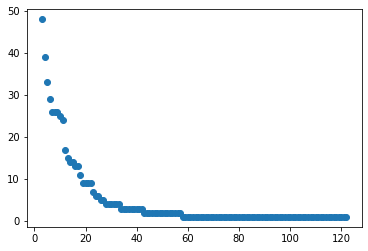

In [32]:
X = X[3:]
Y = Y[3:]
plt.plot(X,Y,"o")
plt.show()

On peut aussi visualiser les tailles relatives des différentes séquences étudiées précedemment,
ainsi que le nombre de mots différents qu'on y trouve.
En bleu : taille de la séquence.
En rouge : nombre de mots trouvés dans la séquence.
Abcisse : numéro de la séquence ( de 0 à 20 ici).
On voit par exemple que la séquence 18 est celle contenant le plus de mots différents, alors que ce n'est pas la plus longue.

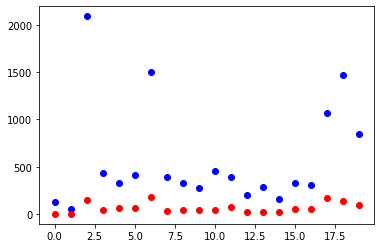

In [30]:
P = proteome[0:20]
X = [k for k in range(len(P))]
Y = [len(k) for k in P]
Y2 = [  len(balayage(words,proteome[k]))   for k in range(len(P)) ]
plt.plot(X,Y,"bo") # En bleu : taille de la séquence.
plt.plot(X,Y2,"ro") # En rouge : nombre de mots trouvés dans la séquence.
plt.show()

On peut utiliser la fonction nbwords() pour le génome entier. Cependant, l'éxecution prend beaucoup de temps.

In [ ]:
L = balayage(words,proteome)
res = nbwords(L)
print(res)